In [17]:
import torch as th
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

print( th.__version__ )

0.2.0_4


0 266230.457784815
1 15956.895521402268
2 3905.722384996317
3 1431.7602827240112
4 643.0559108923042
5 359.9729471657151
6 251.0651680024454
7 205.39495511207852
8 183.34546355389088
9 170.36776456614658


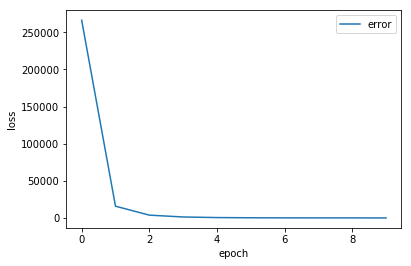

In [16]:


dtype = th.FloatTensor
N, D_in, H, D_out = 64, 1000, 100, 10

#
#  x_(64x1000) ---->  a_64x100 ---> y_64x10  
#              W^1_1000x100     w^2_100x10
#

# randonm input
x = th.randn(N, D_in).type( dtype ) 
y = th.randn(N, D_out).type( dtype )

# random initialization
w1 = th.rand( D_in, H ).type( dtype )
w2 = th.rand( H, D_out).type( dtype )

learning_rate = 1e-6
niters = 10
error = np.zeros(niters)
for t in range( niters ):
    
    #Forward
    z1 = x
    z2 = z1.mm(w1)
    a2 = z2.clamp(min=0)
    z3 = a2.mm(w2)
    yhat = z3
    
    loss = (yhat - y).pow(2).mean()
    print(t, loss)
    error[t] = loss

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (yhat - y)
    grad_w2 = a2.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[z2 < 0] = 0
    grad_w1 = z1.t().mm(grad_h)

    # Update weights using gradient descent
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    

# plot error
plt.plot(error,'-', label='error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()




0 686.0169677734375
1 631.2456665039062
2 584.3085327148438
3 544.17822265625
4 508.70062255859375
5 477.228759765625
6 448.806640625
7 422.8643493652344
8 399.0734558105469
9 377.01947021484375


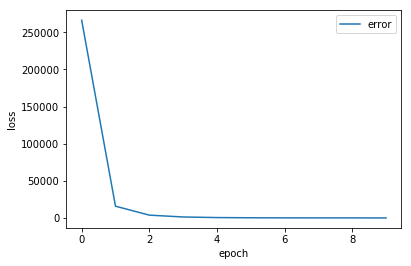

In [33]:


N, D_in, H, D_out = 64, 1000, 100, 10

x = Variable(th.randn(N, D_in))
y = Variable(th.randn(N, D_out), requires_grad=False)

model = th.nn.Sequential(
    th.nn.Linear(D_in, H),
    th.nn.ReLU(),
    th.nn.Linear(H, D_out),
)

loss_fn = th.nn.MSELoss(size_average=False)

learning_rate = 1e-4
niter = 10
erros = np.zeros(niter)
for t in range(niter):
    
    
    yhat = model(x)
    loss = loss_fn(yhat,y)
    print(t,loss.data[0])
    erros[t] = loss.data[0]
    
    model.zero_grad()
    loss.backward()
    
    for param in model.parameters():
        param.data -= learning_rate*param.grad.data
    
    
# plot error
plt.plot(error,'-', label='error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


0 719.0383911132812
1 665.91845703125
2 619.938232421875
3 579.8974609375
4 544.4142456054688
5 513.1660766601562
6 484.68170166015625
7 458.2241516113281
8 433.6163330078125
9 410.652099609375


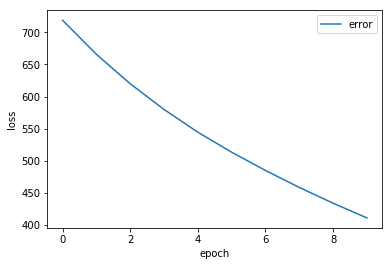

In [36]:
class MyLayerNet(th.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MyLayerNet, self).__init__()
        self.linear1 = th.nn.Linear(D_in, H)
        self.linear2 = th.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


N, D_in, H, D_out = 64, 1000, 100, 10

x = Variable( th.randn(N,D_in) )
y = Variable( th.randn(N,D_out), requires_grad=False  )

net = MyLayerNet(D_in, H, D_out)
criterior = th.nn.MSELoss(size_average=False)
opt = th.optim.SGD( net.parameters(), lr=1e-4 )

niter = 10
error = np.zeros(niter)
for t in range(niter):
    
    yhat = net(x)
    loss = criterior(yhat,y)
    print(t, loss.data[0])
    error[t] = loss.data[0]
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    
# plot error
plt.plot(error,'-', label='error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


